
<h1 style="color:black;font-size:25px;">Getting to Know the Dataset:</h1>  

In [1]:
#a bit working with the dataset directory:

import os

In [2]:
data_dir = 'C:\\Users\\NASA\\Downloads\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
#importing libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.image import imread #to read image files:

In [5]:
test_path = data_dir + '\\test'

train_path = data_dir + '\\train'

In [6]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [7]:
#sowing a parasitized cell image from the train data:

os.listdir(train_path + '\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [8]:
parasite_single_image = train_path + '\\parasitized' + '\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

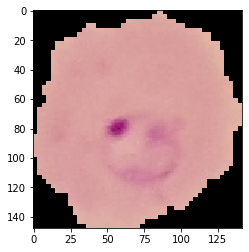

In [9]:
plt.imshow(imread(parasite_single_image)) #syntax to show images using matplotlib, instead of using opencv: cv2.imshow()

In [10]:
#sowing an uninfected cell image from the train data:

os.listdir(train_path + '\\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [11]:
uninfected_single_image = train_path + '\\uninfected' + '\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

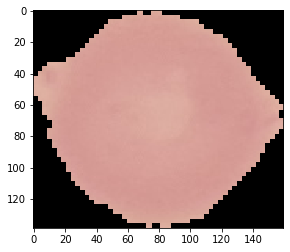

In [12]:
plt.imshow(imread(uninfected_single_image))

In [13]:
pwd #returns the directory you are in right now.

'C:\\Users\\NASA\\Downloads\\TF_2_Notebooks_and_Data\\04-CNNs\\Tina'

In [14]:
# len(os.listdir(train_path + '\\parasitized')) #number of parasitized cell images in 'dataset\\train\\parasitized'
len(os.listdir(test_path + '\\parasitized'))

1300

In [15]:
# len(os.listdir(train_path + '\\uninfected')) #number of uninfected cell images in 'dataset\\train\\uninfected'
len(os.listdir(test_path + '\\uninfected'))

1300

In [16]:
#checking the dimentions of the images:

dim1 = []
dim2 = []

for image_name in os.listdir(test_path + '\\uninfected'):
    image = imread(test_path + '\\uninfected\\' + image_name)
    d1, d2, color = image.shape
    dim1.append(d1)
    dim2.append(d2)
    
#so the images all have different dimentions.

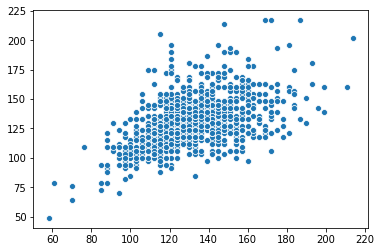

In [17]:
sns.scatterplot(dim1, dim2)

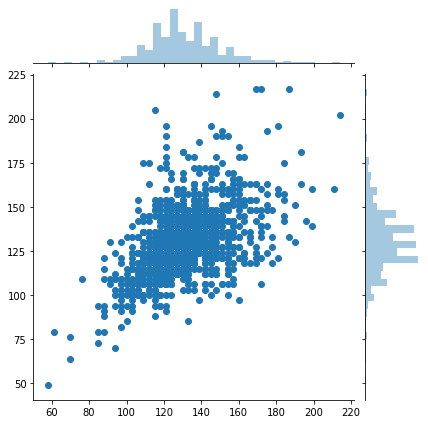

In [18]:
sns.jointplot(dim1, dim2)

In [19]:
np.mean(dim1)

130.92538461538462

In [20]:
np.mean(dim2)

130.75

In [60]:
#so we reshape all the images to have the "sammme" dimention 130x130.

image_shape = (130, 130, 3)


<h1 style="color:black;font-size:25px;">Data Preprocessing:</h1>  

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
#...: the rest can be completed from keras documentation -> Image Preprocessing -> Image Augmentation -> .flow_from_directory(directory)

image_gen = ImageDataGenerator(
                                rotation_range = 20,
                                width_shift_range = 0.1,
                                height_shift_range = 0.1,
                                shear_range= 0.1,
                                zoom_range = 0.1,
                                horizontal_flip = True,
                                fill_mode = 'nearest')



train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2], #or = (130, 130)
                                                batch_size=16, #batch_size  =16
                                                color_mode = 'rgb',
                                                class_mode='binary') #because we have binary classification



test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2], #or = (130, 130)
                                                batch_size=16, #batch_size  =16
                                                color_mode = 'rgb',
                                                class_mode='binary',
                                                shuffle = False) #because we have binary classification

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [63]:
imread(parasite_single_image).max() #so we do not need to rescale the data in "image_gen = ImageDataGenerator"

0.9098039

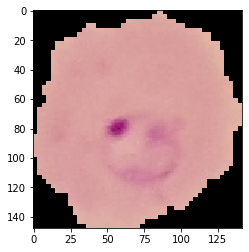

In [64]:
para_image = imread(parasite_single_image)
plt.imshow(para_image)

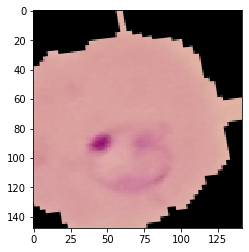

In [65]:
# image_gen.random_transform(para_image)
plt.imshow(image_gen.random_transform(para_image)) #the randomized transformed image

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [66]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [67]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.



<h1 style="color:black;font-size:25px;">Creating the Model:</h1>  

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout

In [69]:
#this is a helpful link to understand how many layers should we add for our CNN model: 
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters

model = Sequential()


#convolutional layer + maxpooling layer: (3 layers of these two)
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))


#flattening layer:
model.add(Flatten())


#ANN layer:
#(Dense layer + Dropout layer):
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))


#compliling the model:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            


<h1 style="color:black;font-size:25px;">Early Stopping:</h1>  

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)


<h1 style="color:black;font-size:25px;">Fitting the Model:</h1>  

In [73]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [74]:
model.fit_generator(
                    train_image_gen,
                    epochs=20,
                    validation_data=test_image_gen,
                    callbacks = [early_stop])

Epoch 1/20
  11/1560 [..............................] - ETA: 17:07 - loss: 8.7931 - accuracy: 0.4261

KeyboardInterrupt: 

In [75]:
#I have interruptrd the above code, because it takes a looong run-time!
#so since the above code takes a long time to be trained, I use the following code to continue:
#which basically, loads a pre-defined model once that we have tested before.

In [76]:
from tensorflow.keras.models import load_model

model = load_model('malaria_detector.h5')

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [78]:
model.history.history 

#so as we can see bellow, method "history.history" is not defined when we load a pre-defined model. But if we are eager to see the history of the model in this manner, we should do the following:

AttributeError: 'Sequential' object has no attribute 'history'

In [86]:
# with open('/trainHistoryDict', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)


<h1 style="color:black;font-size:25px;">Evaluating the Model:</h1>  

In [80]:
#so, we have to use two different functions for evaluateing and predicting our model: ".evaluate_generator()" and ".predict_generator()"

model.evaluate_generator(test_image_gen)

[1.9944376596226652, 0.87]

In [81]:
model.metrics_names

['loss', 'accuracy']

In [87]:
predictions = model.predict_generator(test_image_gen)

In [90]:
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [91]:
threshold = 0.5 #this means: allert the doctors if you are 50% sure. so, you can change this to any percentage of certainty.
#this is the "precision/recall trade-off" concept which is crucial in medicine and physiological applications. -> false + / Fakse -

pred = predictions > threshold

In [92]:
pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
print(classification_report(test_image_gen.classes, pred)) #so, well... we have to convert "test_image_gen" to "test_image_gen.classes" to become a suitable value for "y_true" parameter, and also we have to convert "predictions" to "pred" to to become a suitable variable for "y_pred" parameter.

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.98      0.77      0.86      1300

    accuracy                           0.88      2600
   macro avg       0.89      0.88      0.88      2600
weighted avg       0.89      0.88      0.88      2600



In [98]:
# test_image_gen.classes 
#since y_true in method "classification_report" is 1d array-like, or label indicator array / sparse matrix Ground truth (correct) target values.

array([0, 0, 0, ..., 1, 1, 1])

In [103]:
confusion_matrix(test_image_gen.classes, pred)

array([[1275,   25],
       [ 295, 1005]], dtype=int64)

In [105]:
parasite_single_image #our single image from the test set

'C:\\Users\\NASA\\Downloads\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [106]:
from tensorflow.keras.preprocessing import image

In [109]:
# image.load_img(parasite_single_image)
new_image = image.load_img(parasite_single_image, target_size = image_shape)

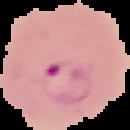

In [110]:
new_image

In [111]:
new_image_array = image.img_to_array(new_image)

In [112]:
new_image_array.shape

(130, 130, 3)

In [113]:
new_image_array = np.expand_dims(new_image_array, axis = 0)

In [114]:
new_image_array.shape  #because "new_image_array" is going to go through our model, and our model (thatwe imported from a.h5 filr) is e=receiveing data in batches, we should re shape the image tothe one it first was: (1, ..., ..., 3)
#or we can use .reshape()

(1, 130, 130, 3)

In [115]:
model.predict_classes(new_image_array) #predicting our image from the test set!

#so as we see bellow, the answere "array([[0]])"  means that this cell is "parasitized: 0" 

array([[0]])

In [116]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}